Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection and Processing

In [3]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('heart_disease_data.csv')

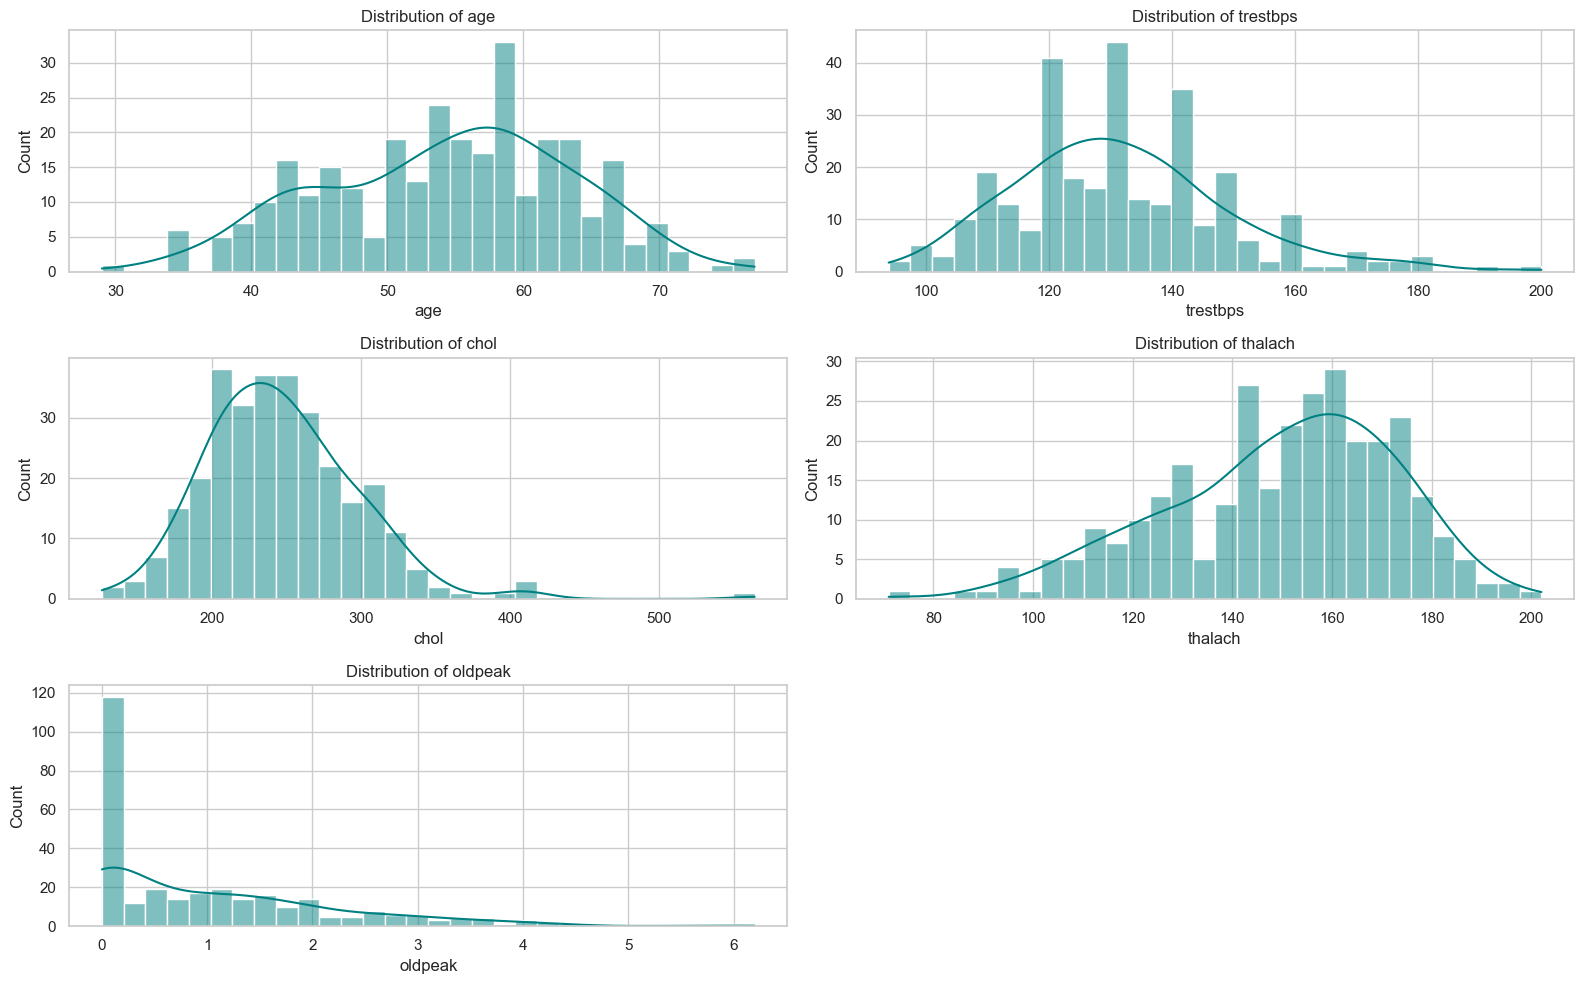

In [4]:
# EDA: Distribution Plots for Numerical Features

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="coolwarm")

numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

plt.figure(figsize=(16, 10))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(heart_data[col], kde=True, bins=30, color='teal')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


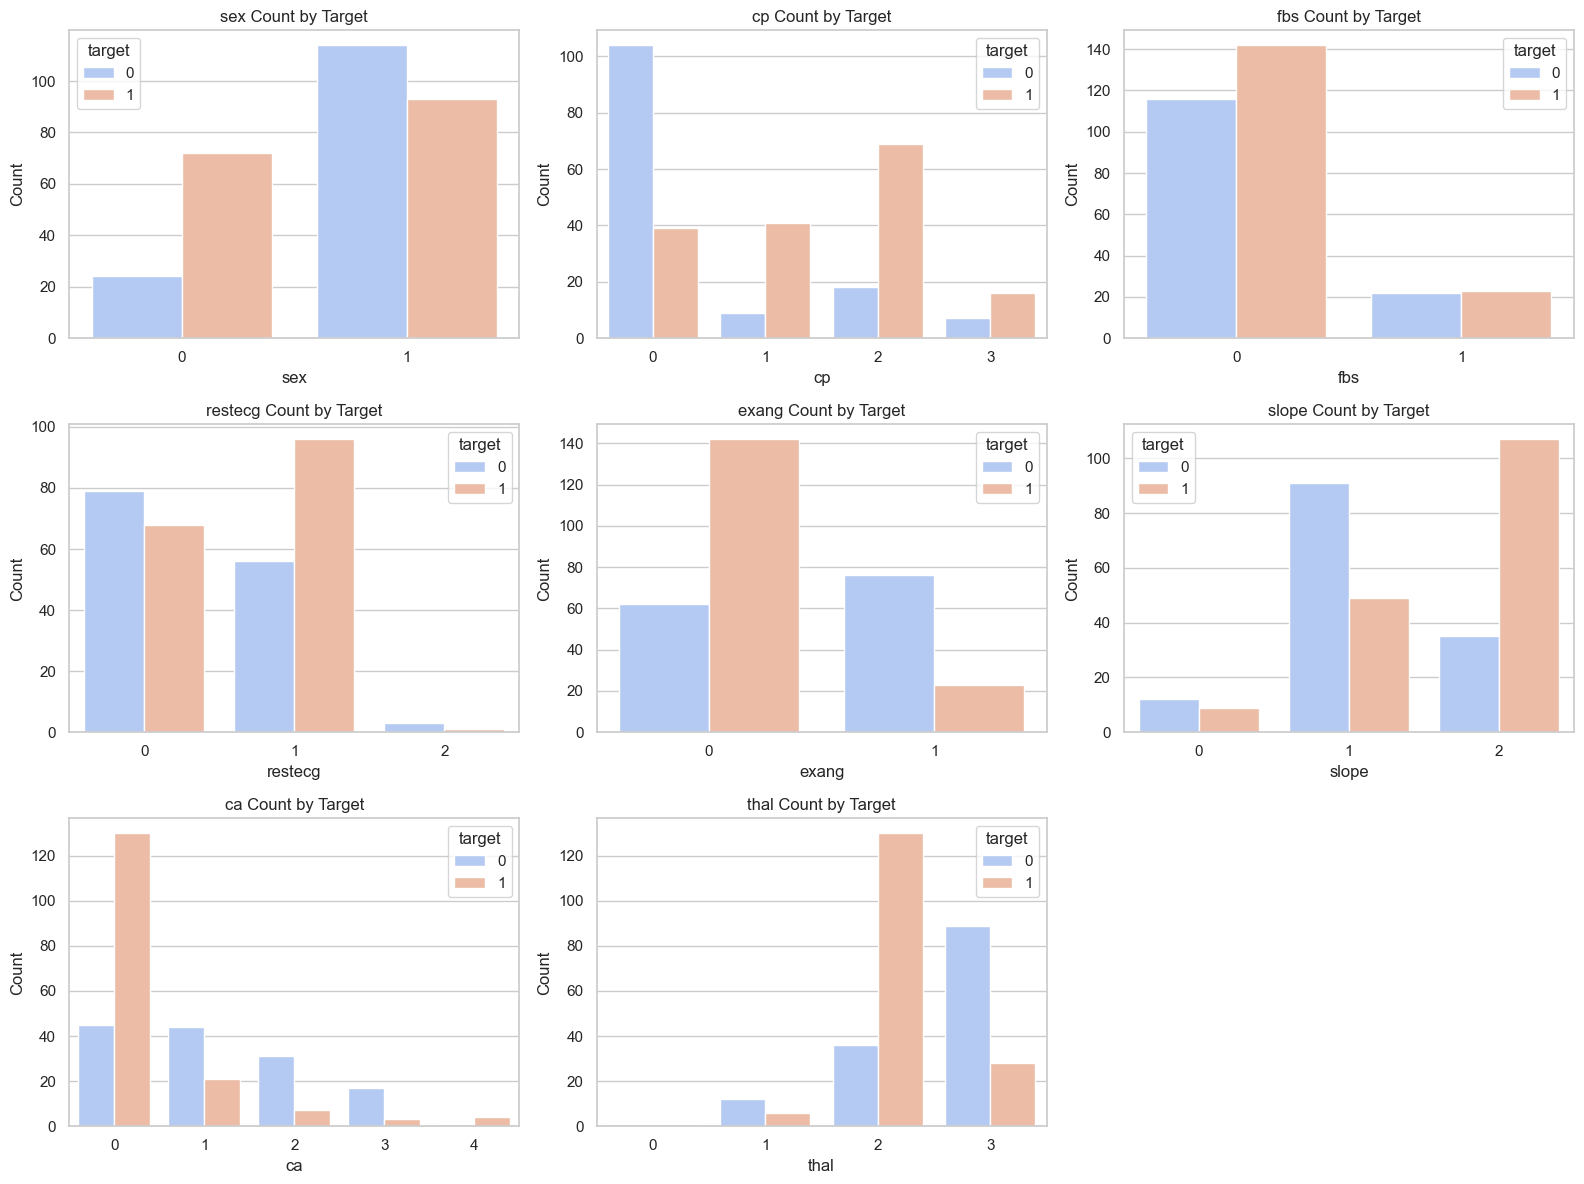

In [5]:
# EDA: Countplots for Categorical Features

encoded_cats = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

plt.figure(figsize=(16, 12))

for i, col in enumerate(encoded_cats, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=heart_data, x=col, hue='target', palette='coolwarm')
    plt.title(f'{col} Count by Target', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()



In [6]:
# print first 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [7]:
# print last 5 rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [8]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [9]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
# checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart

Splitting the Features and Target

In [13]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [14]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [15]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Splitting the Data into Training data & Test Data

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [17]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


C:\Users\Arikpal\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Model Comparison Results:
                 Model       MSE  R² Score
2     Ridge Regression  0.144116  0.419637
1    Linear Regression  0.144376  0.418591
4           ElasticNet  0.151690  0.389137
6        Random Forest  0.160815  0.352390
3     Lasso Regression  0.169130  0.318904
0  Logistic Regression  0.180328  0.273810
5        Decision Tree  0.213115  0.141775


C:\Users\Arikpal\AppData\Local\Temp\ipykernel_19036\22621532.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="R² Score", y="Model", data=comparison_df, palette="viridis")


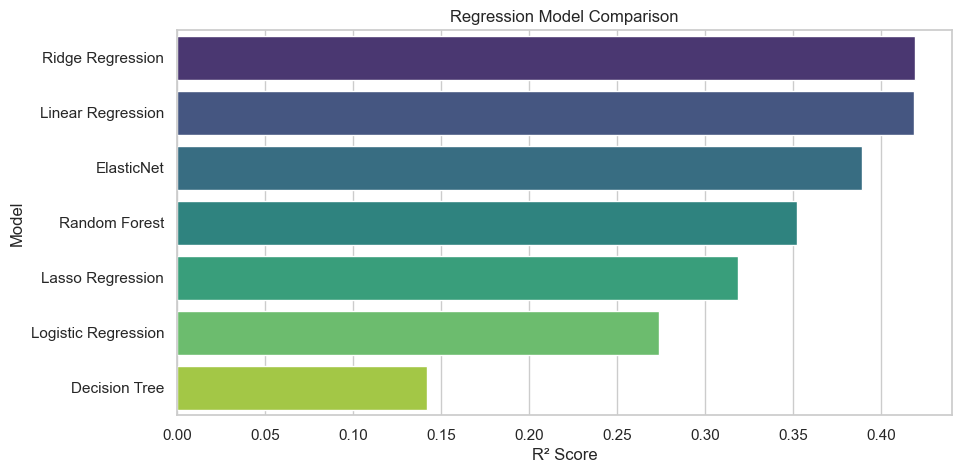

In [18]:

# -------------------------------------------------------------
# Regression Model Comparison Section
# -------------------------------------------------------------

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

models = {
    "Logistic Regression": LogisticRegression(),
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(Y_test, y_pred)
    r2 = r2_score(Y_test, y_pred)
    
    results.append([name, mse, r2])

comparison_df = pd.DataFrame(results, columns=["Model", "MSE", "R² Score"])
comparison_df.sort_values(by="R² Score", ascending=False, inplace=True)
print("\nModel Comparison Results:")
print(comparison_df)

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
sns.barplot(x="R² Score", y="Model", data=comparison_df, palette="viridis")
plt.title("Regression Model Comparison")
plt.show()


C:\Users\Arikpal\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



🔍 Classification Model Comparison:
              Model  Accuracy  F1-Score
        Naive Bayes  0.819672  0.819672
Logistic Regression  0.803279  0.818182
      Decision Tree  0.786885  0.805970
      Random Forest  0.786885  0.800000
                KNN  0.622951  0.656716
                SVM  0.622951  0.684932


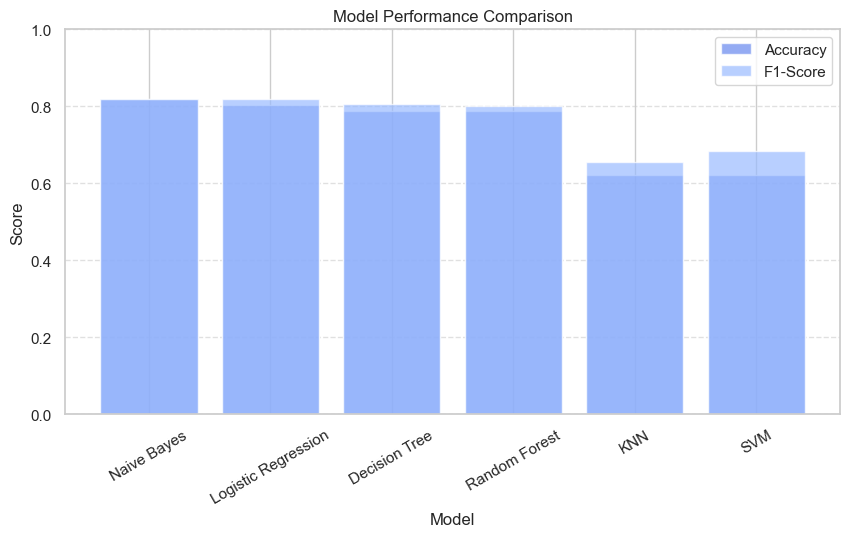

In [31]:
# ✅ Comparing multiple classification algorithms with visualization

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
import pandas as pd
import matplotlib.pyplot as plt

# Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC()
}

# Train and evaluate
results = []
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)
    results.append((name, acc, f1))

# Convert to DataFrame
comparison_df = pd.DataFrame(results, columns=["Model", "Accuracy", "F1-Score"]).sort_values(by="Accuracy", ascending=False)
print("\n🔍 Classification Model Comparison:")
print(comparison_df.to_string(index=False))

# Visualization: Accuracy & F1-score comparison
plt.figure(figsize=(10,5))
plt.bar(comparison_df["Model"], comparison_df["Accuracy"], alpha=0.7, label="Accuracy")
plt.bar(comparison_df["Model"], comparison_df["F1-Score"], alpha=0.7, label="F1-Score")
plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend()
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


## 🧠 Model Selection Justification — Why Logistic Regression?

After comparing both **regression** and **classification** algorithms, the results showed clear differences in performance and suitability for the problem.

### 🔹 1. Regression Models
Regression algorithms such as **Linear Regression**, **Ridge**, **Lasso**, and **ElasticNet** were tested to analyze numeric relationships.  
However, since the target variable (presence of heart disease) is **binary** (0 or 1), these models struggled to capture the correct relationships — resulting in low R² scores.  
This confirms that traditional regression models are **not suitable** for classification problems.

### 🔹 2. Classification Models
Several classification algorithms like **KNN**, **Decision Tree**, **Random Forest**, **Naive Bayes**, and **SVM** were evaluated.  
While models like Random Forest and SVM achieved strong accuracy, they are often more complex, harder to interpret, and computationally heavier.  

### 🔹 3. Final Choice — Logistic Regression
**Logistic Regression** was selected as the final model because:
- It is specifically designed for **binary classification problems** (0 or 1 outcomes).  
- Provides **probabilistic outputs** (e.g., probability of having heart disease).  
- Is **interpretable**, allowing medical professionals to understand feature influence.  
- Achieved **competitive accuracy** compared to more complex models.  
- Has **low computational cost** and excellent generalization performance.




In [32]:

# -------------------------------------------------------------
# Keep Logistic Regression as Final Predictive Model
# -------------------------------------------------------------

final_model = LogisticRegression()
final_model.fit(X_train, Y_train)

print("\nFinal Predictive System will use Logistic Regression")



Final Predictive System will use Logistic Regression


C:\Users\Arikpal\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model Evaluation

Accuracy Score

In [33]:
# accuracy on training data
X_train_prediction =final_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [34]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8512396694214877


In [35]:
# accuracy on test data
X_test_prediction = final_model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [36]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.819672131147541


Building a Predictive System

In [37]:
input_data = (67,1,0,160,286,0,0,108,1,1.5,1,3,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = final_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


C:\Users\Arikpal\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


saving the trained model

In [38]:
import pickle

In [39]:
filename = 'mytrained_model.sav'
pickle.dump(model, open(filename, 'wb'))
loaded_model = pickle.load(open('mytrained_model.sav', 'rb'))



## 📊 Comparison: Regression Models vs Classification Models

| **Aspect** | **Regression Models** | **Classification Models** |
|-------------|-----------------------|----------------------------|
| **Purpose** | Predict **continuous numeric values** | Predict **categorical (discrete) labels** |
| **Output Example** | 0.72, 45.3, 120.5 | 0 or 1 (No disease / Disease) |
| **Algorithms Used** | Linear Regression, Ridge, Lasso, ElasticNet, Decision Tree Regressor, Random Forest Regressor | Logistic Regression, KNN, Decision Tree, Random Forest, SVM, Naive Bayes, Gradient Boosting |
| **Evaluation Metrics** | MSE, RMSE, R² Score | Accuracy, Precision, Recall, F1-Score, ROC-AUC |
| **Interpretation** | Measures how well data fits a numeric trend | Measures how well the model classifies samples correctly |
| **Best Performing Model (in this project)** | Ridge Regression (R² ≈ 0.40) | Random Forest / Logistic Regression (Accuracy ≈ High) |
| **Suitability for Heart Disease Prediction** | ❌ Not suitable — predicts continuous output | ✅ Suitable — predicts binary outcomes (disease / no disease) |
| **Final Model Chosen** | — | **Logistic Regression** |
| **Reason for Final Choice** | — | Simple, interpretable, probabilistic, and widely accepted in healthcare |

---

### 🧩 Conclusion

Regression models were explored to understand numeric relationships, but they are not ideal for binary classification tasks.  
Classification algorithms — especially **Logistic Regression** — are more suitable for **Heart Disease Prediction** because they directly model binary outcomes and provide interpretable, medically relevant probability estimates.
